# Agregaciones

##### Objetivos
1. Agrupar datos por columnas específicas
1. Aplicar métodos a datos agrupados
1. Aplicar funciones built-in para agregar datos

##### Métodos
- <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/dataframe.html" target="_blank">DataFrame</a>: **`groupBy`**
- <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/grouping.html" target="_blank" target="_blank">Grouped Data</a>: **`agg`**, **`avg`**, **`count`**, **`max`**, **`sum`**
- <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html" target="_blank">Built-In Functions</a>: **`approx_count_distinct`**, **`avg`**, **`sum`**

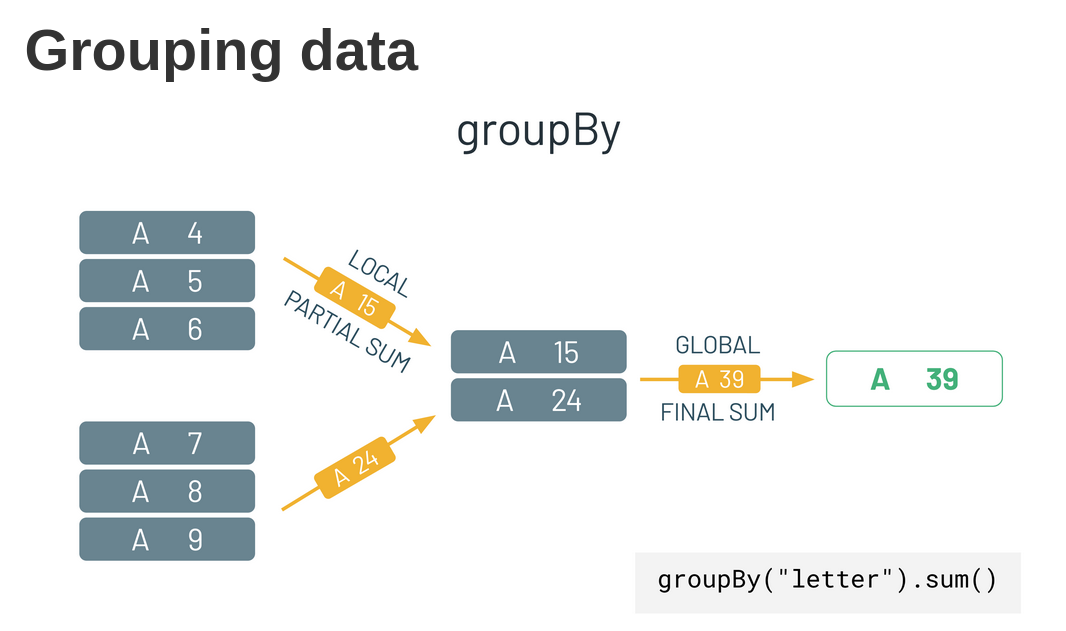

In [ ]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=db9aac9e0b9e74e19472c9af78ee52630fd946073f7531af00149be751cac150
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.master('local[*]').appName('aggr').getOrCreate()
sc = SparkContext.getOrCreate()

In [ ]:
%pip install ucimlrepo

In [ ]:
# https://archive.ics.uci.edu/dataset/45/heart+disease
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

In [ ]:
hd_df = spark.createDataFrame(heart_disease.data.features)

In [ ]:
hd_df

DataFrame[age: bigint, sex: bigint, cp: bigint, trestbps: bigint, chol: bigint, fbs: bigint, restecg: bigint, thalach: bigint, exang: bigint, oldpeak: double, slope: bigint, ca: double, thal: double]

In [ ]:
hd_df.createOrReplaceTempView('heart_disease')

In [ ]:
hd_df.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+
| 63|  1|  1|     145| 233|  1|      2|    150|    0|    2.3|    3|0.0| 6.0|
| 67|  1|  4|     160| 286|  0|      2|    108|    1|    1.5|    2|3.0| 3.0|
| 67|  1|  4|     120| 229|  0|      2|    129|    1|    2.6|    2|2.0| 7.0|
| 37|  1|  3|     130| 250|  0|      0|    187|    0|    3.5|    3|0.0| 3.0|
| 41|  0|  2|     130| 204|  0|      2|    172|    0|    1.4|    1|0.0| 3.0|
| 56|  1|  2|     120| 236|  0|      0|    178|    0|    0.8|    1|0.0| 3.0|
| 62|  0|  4|     140| 268|  0|      2|    160|    0|    3.6|    3|2.0| 3.0|
| 57|  0|  4|     120| 354|  0|      0|    163|    1|    0.6|    1|0.0| 3.0|
| 63|  1|  4|     130| 254|  0|      2|    147|    0|    1.4|    2|1.0| 7.0|
| 53|  1|  4|     140| 203|  1|      2|    155|    1|    3.1|    3|0.0| 7.0|

In [ ]:
spark.sql('select slope from heart_disease').distinct().show()

+-----+
|slope|
+-----+
|    1|
|    3|
|    2|
+-----+



### Métodos de datos agrupados
Métodos de datos agrupados disponibles en: <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/grouping.html" target="_blank">GroupedData</a> object.


| Method | Description |
| --- | --- |
| agg | Compute aggregates by specifying a series of aggregate columns |
| avg | Compute the mean value for each numeric columns for each group |
| count | Count the number of rows for each group |
| max | Compute the max value for each numeric columns for each group |
| mean | Compute the average value for each numeric columns for each group |
| min | Compute the min value for each numeric column for each group |
| pivot | Pivots a column of the current DataFrame and performs the specified aggregation |
| sum | Compute the sum for each numeric columns for each group |

In [ ]:
hd_df.groupBy('sex').count().show()

+---+-----+
|sex|count|
+---+-----+
|  0|   97|
|  1|  206|
+---+-----+



In [ ]:
hd_df.groupBy('age').sum('exang', 'oldpeak').show()

+---+----------+------------------+
|age|sum(exang)|      sum(oldpeak)|
+---+----------+------------------+
| 29|         0|               0.0|
| 65|         0|               8.6|
| 54|         5|              14.9|
| 34|         0|               0.7|
| 50|         1|               6.8|
| 57|         8|              12.2|
| 43|         3|              10.4|
| 39|         0|               1.2|
| 71|         0|               2.0|
| 68|         1|               7.5|
| 58|         5|              26.4|
| 63|         4|              15.3|
| 56|         6|              15.4|
| 51|         7|15.200000000000001|
| 52|         2|               4.9|
| 41|         1|               3.4|
| 67|         3| 8.899999999999999|
| 48|         1|               1.9|
| 44|         2|               4.1|
| 61|         5|              13.7|
+---+----------+------------------+
only showing top 20 rows



## Built-In Functions
Además de los métodos de transformación de DataFrame y Column, existen muchas funciones útiles en el módulo de <a href="https://docs.databricks.com/spark/latest/spark-sql/language-manual/sql-ref-functions-builtin.html" target="_blank">funciones SQL integradas</a> de Spark.

En Scala, esto se encuentra en <a href="https://spark.apache.org/docs/latest/api/scala/org/apache/spark/sql/functions$.html" target="_blank">**`org.apache.spark.sql.functions`**</a>, y <a href="https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions" target="_blank">**`pyspark.sql.functions`**</a> en Python.

### Aggregate Functions

| Método | Descripción |
| --- | --- |
| approx_count_distinct | Returns the approximate number of distinct items in a group |
| avg | Returns the average of the values in a group |
| collect_list | Returns a list of objects with duplicates |
| corr | Returns the Pearson Correlation Coefficient for two columns |
| max | Compute the max value for each numeric columns for each group |
| mean | Compute the average value for each numeric columns for each group |
| stddev_samp | Returns the sample standard deviation of the expression in a group |
| sumDistinct | Returns the sum of distinct values in the expression |
| var_pop | Returns the population variance of the values in a group |

In [ ]:
from pyspark.sql.functions import sum

hd_df2 = hd_df.groupBy('age').agg(sum('thalach').alias('total_thalach'))
hd_df2.show()

+---+-------------+
|age|total_thalach|
+---+-------------+
| 29|          202|
| 65|         1169|
| 54|         2364|
| 34|          366|
| 50|         1059|
| 57|         2445|
| 43|         1239|
| 39|          653|
| 71|          417|
| 68|          557|
| 58|         2790|
| 63|         1383|
| 56|         1602|
| 51|         1782|
| 52|         2174|
| 41|         1647|
| 67|         1220|
| 48|         1164|
| 44|         1857|
| 61|         1161|
+---+-------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import avg

hd_df3 = hd_df.groupBy('age').agg(sum('thalach').alias('total_thalach'), avg('thalach').alias('svg_thalach'))
hd_df3.show()

+---+-------------+------------------+
|age|total_thalach|       svg_thalach|
+---+-------------+------------------+
| 29|          202|             202.0|
| 65|         1169|           146.125|
| 54|         2364|            147.75|
| 34|          366|             183.0|
| 50|         1059|151.28571428571428|
| 57|         2445| 143.8235294117647|
| 43|         1239|           154.875|
| 39|          653|            163.25|
| 71|          417|             139.0|
| 68|          557|            139.25|
| 58|         2790| 146.8421052631579|
| 63|         1383|153.66666666666666|
| 56|         1602|145.63636363636363|
| 51|         1782|             148.5|
| 52|         2174|167.23076923076923|
| 41|         1647|             164.7|
| 67|         1220|135.55555555555554|
| 48|         1164|166.28571428571428|
| 44|         1857| 168.8181818181818|
| 61|         1161|           145.125|
+---+-------------+------------------+
only showing top 20 rows



### Math Functions

| Método | Descripción |
| --- | --- |
| ceil | Computes the ceiling of the given column. |
| cos | Computes the cosine of the given value. |
| log | Computes the natural logarithm of the given value. |
| round | Returns the value of the column e rounded to 0 decimal places with HALF_UP round mode. |
| sqrt | Computes the square root of the specified float value. |

In [ ]:
from pyspark.sql.functions import round

hd_math = hd_df.withColumn('oldpeak_rounded', round('oldpeak'))
hd_math.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---------------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|oldpeak_rounded|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---------------+
| 63|  1|  1|     145| 233|  1|      2|    150|    0|    2.3|    3|0.0| 6.0|            2.0|
| 67|  1|  4|     160| 286|  0|      2|    108|    1|    1.5|    2|3.0| 3.0|            2.0|
| 67|  1|  4|     120| 229|  0|      2|    129|    1|    2.6|    2|2.0| 7.0|            3.0|
| 37|  1|  3|     130| 250|  0|      0|    187|    0|    3.5|    3|0.0| 3.0|            4.0|
| 41|  0|  2|     130| 204|  0|      2|    172|    0|    1.4|    1|0.0| 3.0|            1.0|
| 56|  1|  2|     120| 236|  0|      0|    178|    0|    0.8|    1|0.0| 3.0|            1.0|
| 62|  0|  4|     140| 268|  0|      2|    160|    0|    3.6|    3|2.0| 3.0|            4.0|
| 57|  0|  4|     120| 354|  0|      0|    163|    1|    0.6|    1|0.0